## 色彩空間、色彩模型

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

### RGB色彩模型
- R, G, B三色分別顯示

In [2]:
def RGB_model( f, channel ):
    if channel == 1: # Red
        return f[:,:,2]
    elif channel == 2: # Green
        return f[:,:,1]
    else: # Blue
        return f[:,:,0]


In [5]:
img = cv2.imread( "Rose.bmp", -1 )
im_R = RGB_model( img, 1 )
im_G = RGB_model( img, 2 )
im_B = RGB_model( img, 3 )


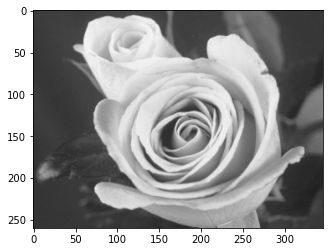

In [7]:
im_R = cv2.cvtColor(im_R, cv2.IMREAD_GRAYSCALE)

plt.imshow(im_R)
plt.show()


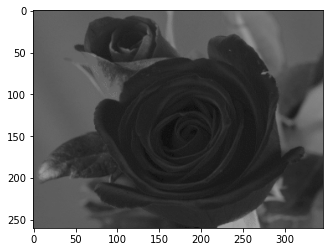

In [8]:
im_G = cv2.cvtColor(im_G, cv2.IMREAD_GRAYSCALE)

plt.imshow(im_G)
plt.show()


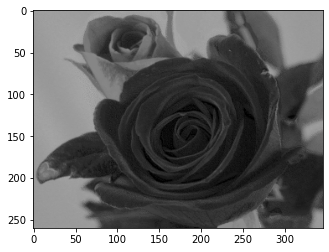

In [9]:
im_B = cv2.cvtColor(im_B, cv2.IMREAD_GRAYSCALE)

plt.imshow(im_B)
plt.show()


### CMY色彩模型
- 印表機採用 CMY 色彩模型
- 現代印表機採用 CMYK 色彩模型

In [10]:
def CMY_model( f, channel ):
    if channel == 1: # Cyan
        return 255 - f[:,:,2]
    elif channel == 2: # Magenta
        return 255 - f[:,:,1]
    else: # Yellow
        return 255 - f[:,:,0]


In [11]:
img = cv2.imread( "Rose.bmp", -1 )
C = CMY_model( img, 1 )
M = CMY_model( img, 2 )
Y = CMY_model( img, 3 )


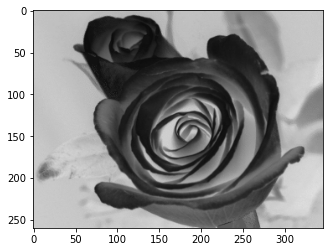

In [12]:
C = cv2.cvtColor(C, cv2.IMREAD_GRAYSCALE)

plt.imshow(C)
plt.show()


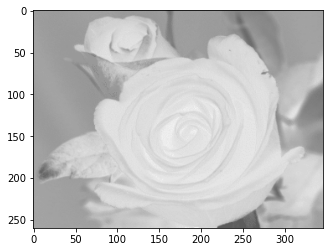

In [13]:
M = cv2.cvtColor(M, cv2.IMREAD_GRAYSCALE)

plt.imshow(M)
plt.show()


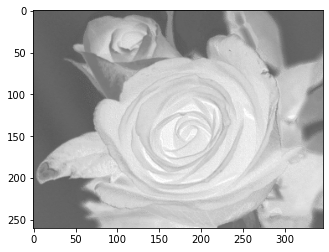

In [14]:
Y = cv2.cvtColor(Y, cv2.IMREAD_GRAYSCALE)

plt.imshow(Y)
plt.show()


### HSI色彩模型
- Hue 色調
- Saturation 飽和度
- Intensity 強度

In [15]:
def RGB_to_HSI( R, G, B ):
    r = R / 255
    g = G / 255
    b = B / 255
    if R == G and G == B:  
        H = -1.0  
        S =  0.0
        I = ( r + g + b ) / 3
    else:                  
        x = ( 0.5 * ( ( r - g ) + ( r - b ) ) ) / \
            np.sqrt( ( r - g ) ** 2 + ( r - b ) * ( g - b ) )
        if x < -1.0:  x = -1.0
        if x >  1.0:  x =  1.0
        theta = np.arccos( x ) * 180 / np.pi
        if B <= G:  
            H = theta
        else:
            H = 360.0 - theta
        S = 1.0 - 3.0 / ( r + g + b ) * min( r, g, b )
        I = ( r + g + b ) / 3
    return H, S, I

def HSI_model( f, channel ):
    nr, nc = f.shape[:2]
    g = np.zeros( [nr, nc], dtype = 'uint8' )
    if channel == 1: # Hue
        for x in range( nr ):
            for y in range( nc ):
                H, S, I = RGB_to_HSI( f[x,y,2], f[x,y,1], f[x,y,0] )
                if H == -1: 
                    k = 0
                else:
                    k = round( H * 255 / 360 )
                g[x,y] = np.uint8( k )
    elif channel == 2: # Saturation
        for x in range( nr ):
            for y in range( nc ):
                H, S, I = RGB_to_HSI( f[x,y,2], f[x,y,1], f[x,y,0] )
                k = round( S * 255 )
                g[x,y] = np.uint8( k )
    else: # Intensity
        for x in range( nr ):
            for y in range( nc ):
                H, S, I = RGB_to_HSI( f[x,y,2], f[x,y,1], f[x,y,0] )
                k = round( I * 255 )
                g[x,y] = np.uint8( k )
    return g


In [16]:
img = cv2.imread( "Rose.bmp", -1 )
H = HSI_model( img, 1 )
S = HSI_model( img, 2 )
I = HSI_model( img, 3 )


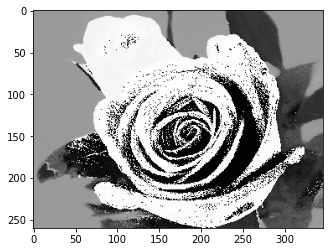

In [17]:
H = cv2.cvtColor(H, cv2.IMREAD_GRAYSCALE)

plt.imshow(H)
plt.show()


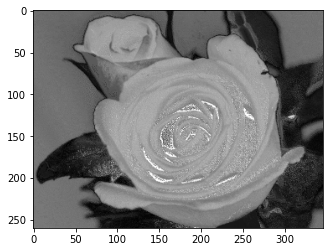

In [18]:
S = cv2.cvtColor(S, cv2.IMREAD_GRAYSCALE)

plt.imshow(S)
plt.show()


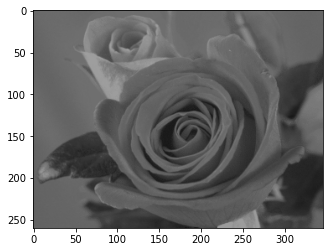

In [19]:
I = cv2.cvtColor(I, cv2.IMREAD_GRAYSCALE)

plt.imshow(I)
plt.show()


### HSV色彩模型
- Hue 色調
- Saturation 飽和度
- Value 值

In [20]:
def HSV_model( f, channel ):
    hsv = cv2.cvtColor( f, cv2.COLOR_BGR2HSV )
    if channel == 1: # Hue
        return hsv[:,:,0]
    elif channel == 2: # Saturation
        return hsv[:,:,1]
    else: # Value
        return hsv[:,:,2]

In [21]:
img = cv2.imread( "Rose.bmp", -1 )
H = HSV_model( img, 1 )
S = HSV_model( img, 2 )
V = HSV_model( img, 3 )


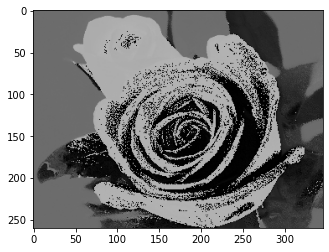

In [22]:
H = cv2.cvtColor(H, cv2.IMREAD_GRAYSCALE)

plt.imshow(H)
plt.show()


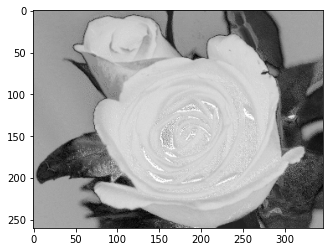

In [23]:
S = cv2.cvtColor(S, cv2.IMREAD_GRAYSCALE)

plt.imshow(S)
plt.show()


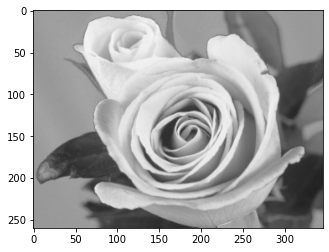

In [24]:
V = cv2.cvtColor(V, cv2.IMREAD_GRAYSCALE)

plt.imshow(V)
plt.show()


### YCrCb 色彩模型
- Y 亮度
- Cr 紅色偏移量
- Cb 藍色偏移量
- 常見於數位影像處理系統，如: JPEG影像壓縮標準、MPEG影像壓縮標準

In [25]:
def YCrCb_model( f, channel ):
    ycrcb = cv2.cvtColor( f, cv2.COLOR_BGR2YCrCb )
    if channel == 1: # Y
        return ycrcb[:,:,0]
    elif channel == 2: # Cr
        return ycrcb[:,:,1]
    else: # Cb
        return ycrcb[:,:,2]

In [28]:
img = cv2.imread( "Rose.bmp", -1 )
Y = YCrCb_model( img, 1 )
Cr = YCrCb_model( img, 2 )
Cb = YCrCb_model( img, 3 )


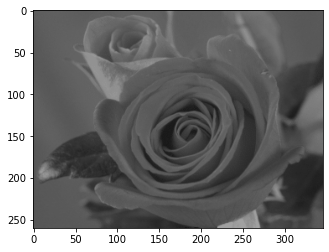

In [29]:
Y = cv2.cvtColor(Y, cv2.IMREAD_GRAYSCALE)

plt.imshow(Y)
plt.show()


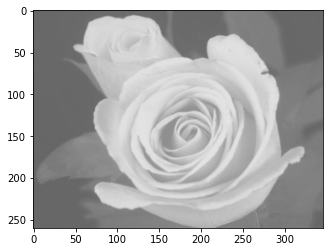

In [30]:
Cr = cv2.cvtColor(Cr, cv2.IMREAD_GRAYSCALE)

plt.imshow(Cr)
plt.show()


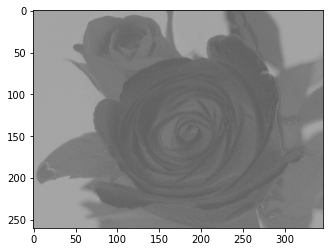

In [31]:
Cb = cv2.cvtColor(Cb, cv2.IMREAD_GRAYSCALE)

plt.imshow(Cb)
plt.show()


In [37]:
Cb.shape

(260, 346, 4)

### 灰階&色彩轉換

- Y = 0.299R+0.587G+0.114B

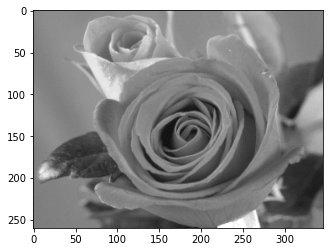

In [33]:
img = cv2.imread( "Rose.bmp", -1 )
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.show()


In [36]:
img_gray.shape

(260, 346)

### 虛擬色彩轉換
- X-ray, 紅外線常用

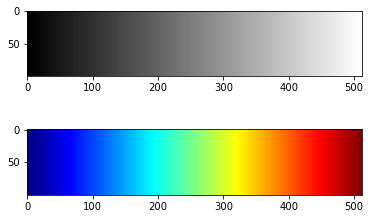

In [51]:
colormap = 2

img1 = cv2.imread( "Gray_Level.bmp", -1 )
img2 = cv2.applyColorMap( img1, colormap )
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,1) 


# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow(img2)

plt.show()

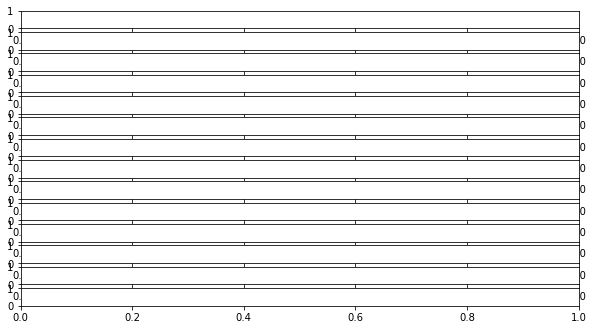

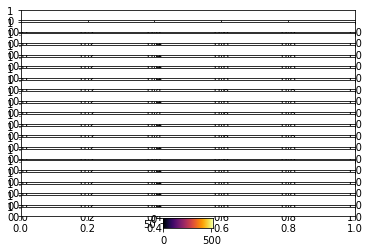

In [56]:
colormap = 2

img1 = cv2.imread( "Gray_Level.bmp", -1 )


fig = plt.figure(figsize=(10, 7)) 
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(19,1) 

fig.add_subplot(18, 1, 1) 
plt.imshow(img1, cmap='gray')
for cm in range(2, 15):
    fig.add_subplot(18, 1, cm) 
    img2 = cv2.applyColorMap( img1, cm )
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2) 

plt.show()

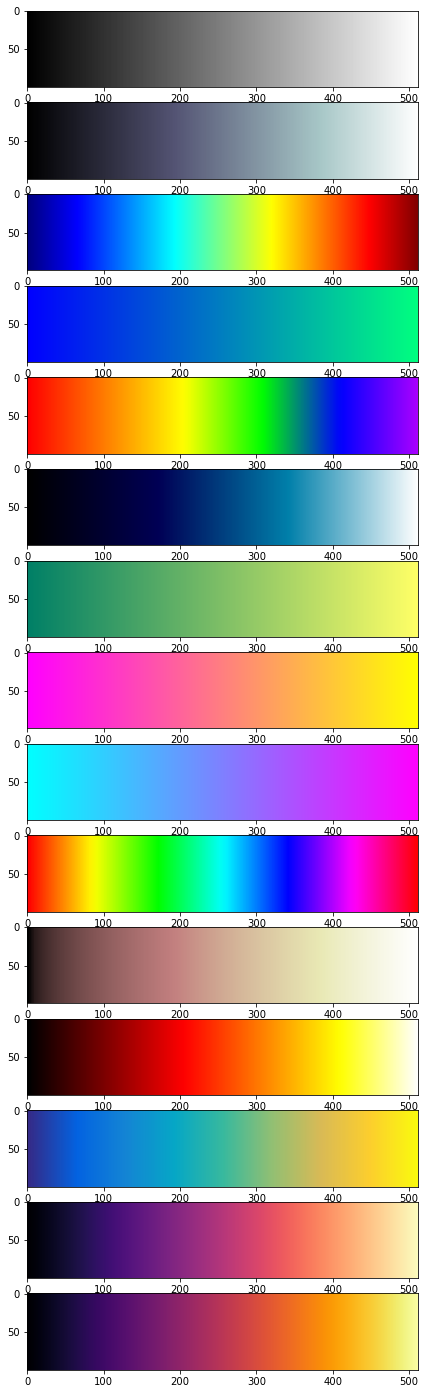

In [64]:
colormap = 2

img1 = cv2.imread( "Gray_Level.bmp", -1 )


f, axarr = plt.subplots(15,1) 
f.set_figheight(25)
f.set_figwidth(10)

axarr[0].imshow(img1, cmap='gray')
for cm in range(1, 15):
    img2 = cv2.applyColorMap( img1, cm )
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    axarr[cm].imshow(img2) 

plt.show()